# Class 3: Cleaning and tidying your data

&nbsp;  
It is very rare for a dataset to be error-free and formatted exactly as you would like. More often than not, you will need to spend some time cleaning and tidying your data to get it ready for analysis. Indeed, it has been estimated that people who work with data spend **80% of their time** finding, cleaning and organising their data, and only 20% of their time analysing it.

In today's class, you'll practice a number of cleaning and tidying tasks, including adding and removing columns, rearranging columns, sorting and transforming the data, and removing duplicates.

## Load the modules

First, let's import pandas and numpy.

In [ ]:
import pandas as pd
import numpy as np

## Adding and removing columns

&nbsp;  
<div>
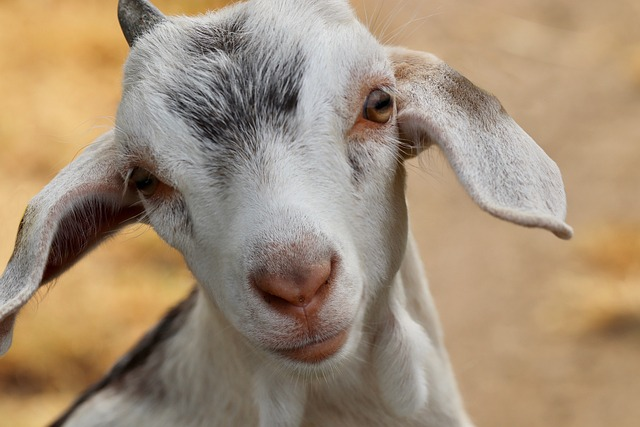
</div>
&nbsp;  

Let's start by reading in one of the datasets we used in the last class, count.csv, from the Datasets folder. Write code in the cell below to read this in and call it df.

Let's add two new columns: one of soil type and one of drainage. We can make the new columns from lists using `df['COLUMN_NAME'] = [LIST]`.

<div class="alert alert-block alert-info">
<b>Remember:</b> In Python, lists are enclosed in square brackets, with the values separated by commas.
</div>

In [ ]:
df['Soil'] = ['Sand', 'Loam', 'Loam', 'Clay', 'Clay', 'Loam', 'Sand', 'Sand', 'Clay', 'Clay']
df['Drainage'] = ['Good', 'OK', 'Poor', 'Poor', 'Poor', 'Good', 'Good', 'OK', 'OK', 'Poor']

Let's have a look at our new dataset to check our new columns have been added correctly.

In [ ]:
df

Now let's have a go removing a column. To drop a single column you can use the code `df = df.drop(columns = 'COLUMN_NAME')`. To drop multiple columns, you need to place the column names inside a list: `df = df.drop(columns = ['COLUMN_NAME1', 'COLUMN_NAME2'])`.

Write code in the cell below to drop the 'Goats' column.

Now write code to drop both the 'Barley' and 'Oats' columns.

Lets have a look to see whether everything has worked.

In [ ]:
df

It is also possible to use the `df.drop()` function to remove **rows** rather than columns. To drop a row, you can use the code `df = df.drop(ROW_NUMBER)`. (Note: For this function, Python assumes anything inside the brackets relates to a row. That is why you need to include the code `columns = ...` when you want to drop a column).

Type code in the cell below to remove the 5th row, then check that is has worked. Remember that Python indexing starts at 0!

## Rearranging columns

Sometimes, you might want your columns (or rows) in a certain order. The easiest way to do this is to make a list of your column names, rearrange your list into the order you want, then apply this new order to the dataframe. Have a look through the code in the cells below and see if you can follow these steps.

In [ ]:
cols = df.columns.tolist()
cols

In [ ]:
cols_new = [cols[1], cols[3], cols[2], cols[0]]
cols_new

In [ ]:
df = df[cols_new]
df

Let's have a go rearranging the columns into alphabetical order. In the last class, we used a function called `sort_values` for sorting. However, this function is for dataframes, whereas we need to sort a list. So let's use another function, called `sorted`, instead. By default, `sorted` sorts numbers in ascending order, and strings in alphabetical order.

In [ ]:
cols = df.columns.tolist()
cols

In [ ]:
cols_new = sorted(cols)

In [ ]:
df = df[cols_new]
df

In the cell below, have a go rearranging the dataset so that the columns are in reverse alphabetical order. You will need to edit the `sorted` function so that the order is reversed. Have a look at this Python cheat sheet if you need help: https://www.pythoncheatsheet.org/builtin/sorted.

## Sorting data

In last weeks class, you were introduced to the `sort_values` function, which can be used to sort columns within a dataframe. To use this function, all you need to do is specify the column(s) and the direction: `df = df.sort_values(by = [col1, col2], ascending = False)`.

First, reload the count.csv dataset since we have removed so many columns. Again, call it df.

Now, sort the dataset by 'Sheep' in ascending order and check it has worked.

Sort the dataset by 'Sheep' then 'Oats' in ascending order and check it has worked.

Sort by 'Barley' in descending order and check it has worked.

## Transforming data

It's also possible to make new columns by transforming existing columns.

Numerical columns can be treated like numbers. For example:

- `df['More_Sheep'] = df['Sheep'] * 50`
- `df['Per_Sheep'] = df['Barley'] / df['Sheep']`
- `df['Nonsense'] = df['Goats] * df['Oats']`

Numpy allows you to do even fancier operations:

- `df['Logged_Oats'] = np.log(df['Oats'])`
- `df[Sqrt_Barley'] = np.sqrt(df['Barley'])`

... etc

Make a column called 'Cereals' which is the sum of 'Barley' and 'Oats'. Check to see your code has worked correctly.

Now make another column called 'Half_Cereals' by dividing this by 2.

It is also possible to transform columns that are coded as strings. First, let's add our 'Drainage' and 'Soil' columns.

In [ ]:
df['Soil'] = ['Sand', 'Loam', 'Loam', 'Clay', 'Clay', 'Loam', 'Sand', 'Sand', 'Clay', 'Clay']
df['Drainage'] = ['Good', 'OK', 'Poor', 'Poor', 'Poor', 'Good', 'Good', 'OK', 'OK', 'Poor']

Now, we can make a new column called 'Soil_Drainage' by concatenating these together and separating them with an underscore.

In [ ]:
df['Soil_Drainage'] = df['Soil'] + '_' + df['Drainage']
df

Try adding another column called 'Drainage_Oats' by concatenating 'Drainage' and 'Oats' together using the same method as the cell above. What happens?

This code has failed because we have 'Oats' coded as an integer. We could recode 'Oats' as text in the dataframe using `df = df.astype({'Oats': string})` but that might make things difficult when we come to do our analysis. Instead, let's tell pandas to treat 'Oats' as text just for the concatenation.

In [ ]:
df['Drainage_Oats'] = df['Drainage'] + '_' + df['Oats'].astype(str)
df

Before we move on, let's just explore how we might split a text column. This might be useful, for example, when we have a column of species names (e.g. *Macropus rufus*) and we want to create two new columns separating the genus (*Macropus*) and species (*rufus*). In this example, we'll split the 'Soil_Drainage' column on the underscore, then add them back in as two new columns.

In [ ]:
df[['Soil_new', 'Drainage_new']] = df['Soil_Drainage'].str.split('_', expand = True)
df

## Removing duplicates

It is easy to remove duplicated rows using the `drop_duplicates` function. There aren't any duplicated rows in the count.csv dataset, so lets create a new dataset to illustrate how this works.

In [ ]:
data = pd.DataFrame([[1, 6.5, 3], [1, 6.5, 3], [2, 4, 7.2], [0.9, 6.5, 3]])
data

The first two rows are duplicated. We can drop the duplicated row using the following code...

In [ ]:
data = data.drop_duplicates()
data

And if we want to reset the index...

In [ ]:
data = pd.DataFrame([[1, 6.5, 3], [1, 6.5, 3], [2, 4, 7.2], [0.9, 6.5, 3]])
data = data.drop_duplicates().reset_index(drop = True)
data

Have a go removing the duplicated rows from the dataset below, and reset the index.

In [ ]:
data = pd.DataFrame([[5.4, 1.3, 8.9, 2.0], [4.2, 6.6, 3.7, 1.9], [2.7, 3.0, 9.1, 9.3], 
                     [4.2, 6.6, 3.7, 1.9], [7.6, 4.4, 9.0, 4.3], [7.6, 4.4, 9.0, 4.3]])
data

## If you have time in class, or for homework...

Read in surveys.csv from the Datasets folder, and call it 'surveys'. This dataset contains a record of the animal species observed during a long-term study of a desert ecosystem in Arizona (S. K. Morgan Ernest *et al*. 2009. Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA. Ecology 90:1708.).

&nbsp;  
<div>
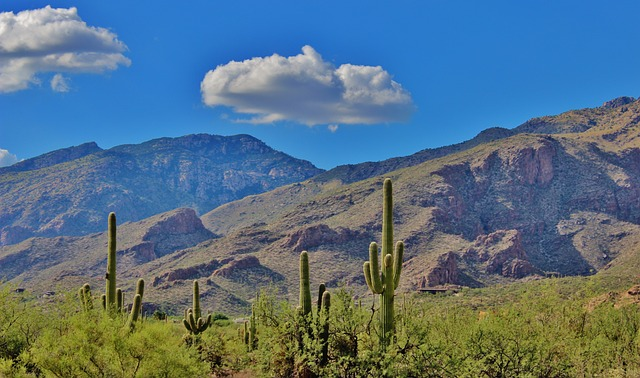
</div>
&nbsp;  

Use `surveys.head()` to check it has loaded correctly.

Drop the 'record_id' column.

Rearrange the remaining columns so that 'species_id' is first. Use `surveys.head()` to check your code has worked.

Sort by 'plot_id' and then by 'species_id' in ascending order.

Add a new column called 'hindfoot_length_cm' which converts the 'hindfoot_length' column from mm to cm.

Add a new column called 'date' which concatenates the 'day', 'month' and 'year' columns into a day/month/year format.

And some revision from last class - remove any rows containing missing values.

Now use `surveys.head()` again to check all your formatting has worked.

Continue to practice some of these commands on your own datasets, or on others found in the Datasets folder.